# Linear Regression Analysis

In this script, our primary objective is to perform a thorough analysis of the relationship between dependent and independent variables using linear regression and supervised machine learning techniques.

In our previous analysis, we identified a strong correlation between happiness scores and factors such as freedom of life choices and trust in the government within the top three happiest regions. However, for the three least happy regions, health and economy emerged as the most significant factors.

In this analysis, we will expand our scope to include all countries and aim to determine the predominant factors contributing to high levels of happiness. Additionally, we will investigate whether these factors remain consistent across all countries.

## INDEX

- [Data Cleaning](#Data-Cleaning)
- [Data Exploration](#Data-Exploration)
    - [Hypothesis](#Hypothesis:)
- [Data Prep For Regression Analysis](#Data-Prep-For-Regression-Analysis)
- [Regression Analysis](#Regression-Analysis)
- [Key Takeaway & Insights](#Key-Takeaway)


In [88]:
#import necessary libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [89]:
#import the dataset for World Happiness Report 
path = '/Users/satoruteshima/Documents/CareerFoundry/06 Date Immersion 6/Data/Clean/whr_merged.csv'
df = pd.read_csv (os.path.join(path))

### Data Cleaning

In [90]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Country', 'Region', 'Happiness Rank',
       'Happiness Score', 'Economy (GDP per Capita)',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Year'],
      dtype='object')

In [14]:
df.shape

(1230, 10)

In [91]:
#drop unnecessary column 
Dropcolumns = ['Unnamed: 0.1'
                ,'Unnamed: 0']

df = df.drop(columns=Dropcolumns)

In [92]:
df_sub = df[df['Country'].map(df['Country'].value_counts()) >7] 

In [22]:
df_sub.shape

(1112, 10)

#### Missing values

In [93]:
# Check for missing values
df_sub.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Year                             0
dtype: int64

#### check duplicates

In [65]:
dups = df_sub.duplicated()
dups.shape # No dups

(1112,)

## Data Exploration 

### Check correlation

In [34]:
df_sub.corr()

/var/folders/y7/609s2c2s66d153pxhbp7hmhh0000gn/T/ipykernel_81857/2510699769.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_sub.corr()


,Happiness Rank,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
Happiness Rank,1.000000,-0.989237,-0.734174,-0.715343,-0.511873,-0.410843,-0.114007,-0.040114
Happiness Score,-0.989237,1.000000,0.729165,0.710373,0.523739,0.437723,0.137384,0.056341
Economy (GDP per Capita),-0.734174,0.729165,1.000000,0.675921,0.371669,0.373248,-0.084385,0.238769
Health (Life Expectancy),-0.715343,0.710373,0.675921,1.000000,0.284990,0.303000,0.007946,-0.009945
Freedom,-0.511873,0.523739,0.371669,0.284990,1.000000,0.471492,0.258317,0.250514
Trust (Government Corruption),-0.410843,0.437723,0.373248,0.303000,0.471492,1.000000,0.233967,0.039980
Generosity,-0.114007,0.137384,-0.084385,0.007946,0.258317,0.233967,1.000000,-0.258161
Year,-0.040114,0.056341,0.238769,-0.009945,0.250514,0.039980,-0.258161,1.000000


`Economy` and `Health` seems to have a strong relationship with Happiness Score. 
 
#### Hypothesis:

**Countries with stronger economies are more likely to experience higher levels of happiness.**

#### check extreme values 


/var/folders/y7/609s2c2s66d153pxhbp7hmhh0000gn/T/ipykernel_81857/1616754535.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_sub['Economy (GDP per Capita)'], bins=25) # Shows extreme values


<Axes: xlabel='Economy (GDP per Capita)', ylabel='Density'>

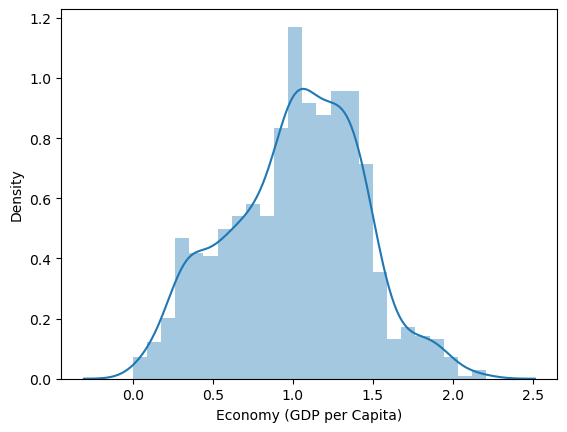

In [35]:
sns.distplot(df_sub['Economy (GDP per Capita)'], bins=25) # Shows extreme values

#### check mean

In [36]:
df_sub['Economy (GDP per Capita)'].mean() # Check the mean

1.016162028817097

#### check median


In [37]:
df_sub['Economy (GDP per Capita)'].median() # Check the median

1.043225

#### check max

In [38]:
df_sub['Economy (GDP per Capita)'].max() # Check the max

2.209

## Data Prep For Regression Analysis

### Scatterplot 

Economy vs Happiness Score

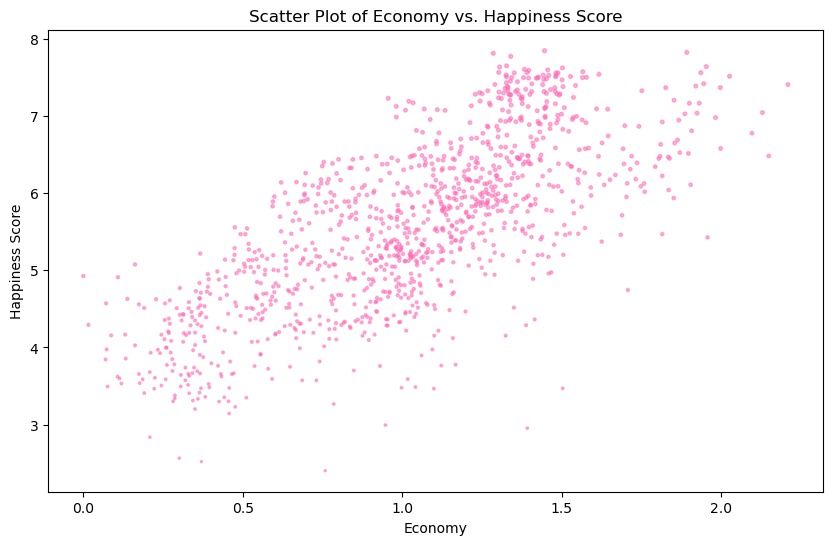

In [40]:
# Data

x = np.array(df_sub['Economy (GDP per Capita)'])
y = np.array(df_sub['Happiness Score'])
sizes = np.array(df_sub['Happiness Score'])

# Create a scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x, y, c='hotpink', s=sizes, alpha=0.5)


# Set x-axis and y-axis labels
plt.xlabel('Economy')
plt.ylabel('Happiness Score')

# Set title
plt.title('Scatter Plot of Economy vs. Happiness Score')

plt.show()

In [94]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_sub['Economy (GDP per Capita)'].values.reshape(-1,1)
y = df_sub['Happiness Score'].values.reshape(-1,1)

In [95]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Regression Analysis

In [96]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [97]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [98]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

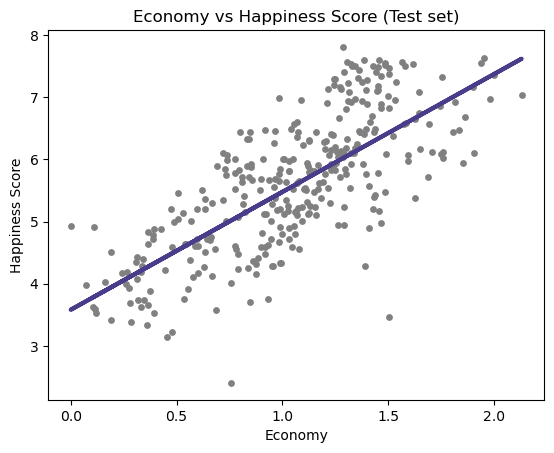

In [107]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt

plot_test.scatter(X_test, y_test, color='gray', s=15)
plot_test.plot(X_test, y_predicted, color='DarkSlateBlue', linewidth=3)
plot_test.title('Economy vs Happiness Score (Test set)')
plot_test.xlabel('Economy')
plot_test.ylabel('Happiness Score')

# Save the plot as an image
plot_test.savefig('linearregression.png')

#### Insights

- The trendline does not seem to fit the data well.
- Some outliers are noticeable around the 0.1, 0.7, and 1.5 points, which may be influencing the trendline.
- The data is concentrated around a happiness score of 5.0 and an economy score of 1.0.

In [49]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [50]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.89677656]]
Mean squared error:  0.5512312446749096
R2 score:  0.5389527368317651


In [62]:
#Compare the predicted y values with the actual y values in a dataframe
y_predicted

data = pd.DataFrame({'actual': y_test.flatten(), 'predicted': y_predicted.flatten()})
data.head(30)


,actual,predicted
0,4.9096,3.785807
1,4.8800,4.386459
2,5.9210,6.198013
3,4.2410,5.074989
4,5.9988,5.490438
5,4.2830,5.389854
6,4.8880,6.254784
7,5.4660,4.543891
8,4.8910,5.534009
9,5.5280,5.798988


### Key Takeaway

- There is a notable difference between the actual and predicted y values.
- The Mean Squared Error (MSE) indicates that the model's predictions are relatively far from the actual data points.
- The R-squared (R2) score of 0.55 suggests that the model is not an ideal fit for the data.

### Insights

- This analysis disproves the hypothesis 'Countries with stronger economies are more likely to experience higher levels of happiness'. This analysis illuminates that the levels of happiness cannot simply be explained by the economy. 

## Back to the [TOP](#INDEX)